<a href="https://colab.research.google.com/github/JonasHagstrom79/Tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with Neural Networks in TensorFlow
There are many definitions for regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other commbination of variables, even shorter... predicting a number.


In [1]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


#Creating some data to view and fit

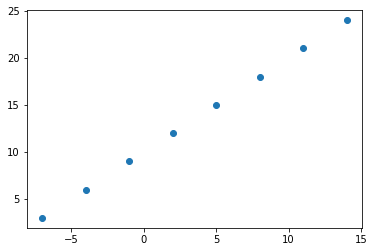

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create features(upper case)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) 

#Create labels(lower case)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y);

In [3]:
y == X + 10 #(The relationship for our neural network to learn)

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and output shapes

In [4]:
#Create a deo tensor for our price predicition problem
house_info  = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
#X to predict y
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
#X to predict y
X[0], y[0]

(-7.0, 3.0)

In [7]:
#X to predict y
X[1], y[1]

(-4.0, 6.0)

### Fix

If you're running TensorFlow 2.7.0+ and you're passing a vector to a model, you need to expand its dimensions.

    ## OLD
    # Fit the model
    model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
     
    ## New
    # Fit the model
    model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line

The code adds an extra dimension to X on the last axis, turning it ndim=1 to ndim=2 (what the model requires).

In [14]:
#Turn our NumPy arrays into tenors
X = tf.cast(tf.constant(X), dtype=tf.float32) #Change dtype from float64 to float 32
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

##Steps in modeling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function(in other words, the function wich tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics(what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y(features and labels)

In [15]:
#Set random seed
tf.random.set_seed(42)

#1. Create a model using Sequentila API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) #input, the model takes in one number and predicts one number, adds the layer to a list, thare are other ways to do this aswell. I.e model = tf.keras.Sequential(), new line. model.add(tf.keras.layers.Dense(1))
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error(i.e how wrong is our predictions)
              optimizer=tf.keras.optimizers.SGD(), #SGD is short for stochastic gradient descent
              metrics=["mae"]) #You can often use a string variable to define that you want to ue that specific function

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) #Look at X and y and try to figure out the paterns/relationships in epoch tries


Epoch 1/5
1/1 [==============================] - 0s 323ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


🔧 **Practice:** Info and example of Sequential: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

In [16]:
#Check out of X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
#Try to make a prediction with our model
y_pred = model.predict([17.0]) #A prediction to X=17 an y SHOULD BE 27(X+10..)
y_pred

array([[12.716021]], dtype=float32)

In [20]:
y_pred  + 11

array([[23.71602]], dtype=float32)

#Improving our model